# **3.2 미니 프로젝트: 택시요금 데이터 다루기**

<br>

## **Project: 택시 이용내역 데이터**

---

#### **프로젝트 수행 방법**

이번 프로젝트에서 사용할 데이터 이름은 trip.csv입니다. 다양한 변수들을 활용하여 “택시 요금”을 예측한다는 가정하에 데이터를 정제해보세요.

지금까지 배운 내용을 최대한 활용하여 문제가 되는 부분을 찾아 정리하고, 최대한 변수들을 머신러닝 알고리즘에 활용 가능하도록 만들어봅시다.

<br>

#### **데이터 불러오기, 데이터 확인**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/DS_5th/03_비정형데이터 체험하기/16일차_1 7(수)/data/trip.csv')

In [4]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [5]:
# Q. info() 메서드를 사용하여 데이터 컬럼명과 자료형을 확인합니다.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [7]:
# Q. describe() 메서드를 사용하여 데이터 컬럼별 통계량을 확인합니다.

In [8]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


<br>

#### **중복 데이터 확인**

In [9]:
# Q. 중복 데이터를 확인합니다.

In [10]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
22696,False
22697,False
22698,False
22699,False


In [13]:
data.duplicated().sum()  # 데이터 전체 22,701행 중에서 완전히 동일한 행이 2개 존재한다는 뜻

np.int64(2)

In [14]:
# 중복된 행에서 승객명 확인하기

In [15]:
data[data.duplicated()]['passenger_name']

,passenger_name
17,Sarah Gross
204,Lisa Bullock


In [16]:
# 중복된 전체 행

In [17]:
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [21]:
# 확인한 승객명으로 데이터 조회

In [19]:
data[data['passenger_name'] == 'Sarah Gross']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [20]:
data[data['passenger_name'] == 'Lisa Bullock']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
203,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.0,0.0


In [22]:
# Q. 중복 데이터를 제거합니다.

In [23]:
data = data.drop_duplicates()

In [24]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


<br>

#### **결측치 확인**

In [26]:
# 컬럼별 결측치 개수 확인

In [25]:
data.isna().sum()

,0
passenger_name,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,3
tip_amount,0
tolls_amount,0


In [27]:
# Q. 전체 데이터 대비 결측치의 비율을 확인합니다.

In [28]:
data.isnull().mean()

,0
passenger_name,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
payment_method,0.000000
passenger_count,0.000000
trip_distance,0.000000
fare_amount,0.000132
tip_amount,0.000000
tolls_amount,0.000000


In [30]:
# Q. 결측치를 제거합니다.

In [29]:
before = data.shape[0]
data = data.dropna(subset=["fare_amount"])
after = data.shape[0]

print(before, "→", after)

22699 → 22696


In [31]:
data.isna().mean()

,0
passenger_name,0.0
tpep_pickup_datetime,0.0
tpep_dropoff_datetime,0.0
payment_method,0.0
passenger_count,0.0
trip_distance,0.0
fare_amount,0.0
tip_amount,0.0
tolls_amount,0.0


<br>

#### **passenger_count 컬럼의 이상치 제거**

In [32]:
# passenger_count 컬럼의 값을 기준으로 정렬합니다.

In [33]:
data['passenger_count'].sort_values()

,passenger_count
21754,0
21640,0
21218,0
20312,0
19458,0
...,...
21119,6
3867,6
3903,6
3878,6


In [34]:
# passenger_count 값의 scatter plot을 그립니다.

<Axes: xlabel='None', ylabel='passenger_count'>

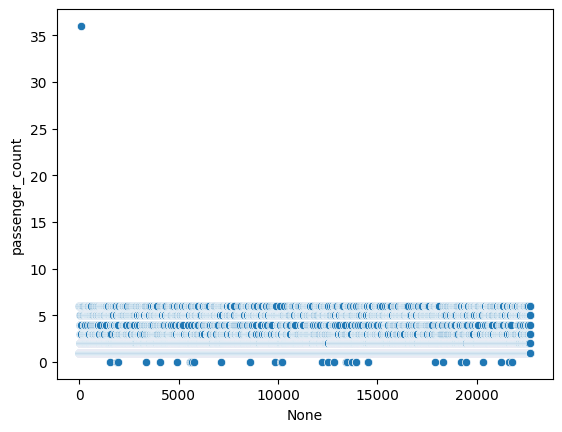

In [35]:
sns.scatterplot(x = data.index, y = data['passenger_count'])

In [36]:
# passenger_count 컬럼의 이상치를 제거합니다.
# (passenger_count가 6을 초과하는 경우)

In [37]:
data = data[data['passenger_count'] <= 6]

In [38]:
# 최대값 확인
data['passenger_count'].max()

6

In [40]:
# 값 분포 확인
data['passenger_count'].value_counts().sort_index()

,count
passenger_count,
0,33
1,16115
2,3305
3,952
4,455
5,1143
6,692


In [41]:
# 조건 위반 데이터 재확인
data[data['passenger_count'] > 6]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


In [42]:
# 제거 전·후 행 개수 비교 (보고용)
print(data.shape)
print(len(data))

(22695, 9)
22695


In [43]:
# passenger_count 컬럼의 이상치를 확인합니다.
# (passenger_count가 0인 경우)

In [44]:
len(data[data['passenger_count'] == 0])

33

In [45]:
# passenger_count 컬럼의 이상치를 제거합니다.

In [46]:
data = data[data['passenger_count'] != 0]

In [47]:
(data['passenger_count'] == 0).sum()

np.int64(0)

In [48]:
data['passenger_count'].value_counts().sort_index()

,count
passenger_count,
1,16115
2,3305
3,952
4,455
5,1143
6,692


In [51]:
data[data['passenger_count'] == 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


In [49]:
# passenger_count의 scatter plot을 다시 그려봅니다.

<Axes: xlabel='None', ylabel='passenger_count'>

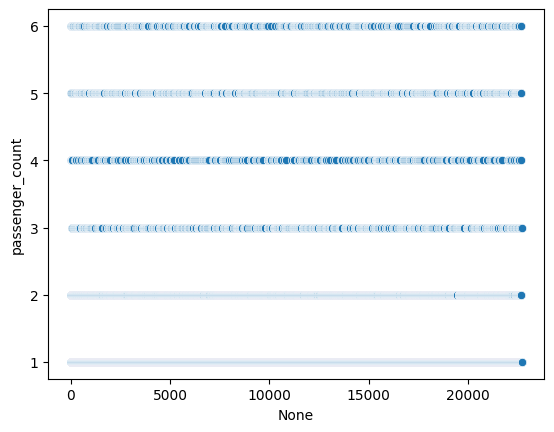

In [50]:
sns.scatterplot(x = data.index, y = data['passenger_count'])

<br>

#### **수치형 컬럼의 이상치 제거**

In [53]:
# 이상치 확인용 정석 코드 (가장 많이 씀)

In [52]:
data['trip_distance'].describe()

,trip_distance
count,22662.000000
mean,2.912906
std,3.652999
min,0.000000
25%,0.990000
50%,1.610000
75%,3.060000
max,33.960000


In [54]:
# 분포 기반으로 이상치 감 잡기 (추천)

In [56]:
data['trip_distance'].value_counts().sort_index().tail(10)

,count
trip_distance,
27.97,1
28.20,1
28.23,1
30.33,1
30.50,1
30.83,1
31.95,1
32.72,1
33.92,1


In [59]:
# IQR 기준 이상치 범위 확인

In [58]:
Q1 = data['trip_distance'].quantile(0.25)
Q3 = data['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

0.99
3.06
2.0700000000000003


In [60]:
# Q. trip_distance의 이상치를 제거합니다.

In [61]:
data = data[
    (data['trip_distance'] >= Q1 - 1.5 * IQR) &
    (data['trip_distance'] <= Q3 + 1.5 * IQR)
]

In [64]:
Q1 = data['trip_distance'].quantile(0.25)
Q3 = data['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

0.9
2.4
1.5


In [65]:
data['trip_distance'].describe()

,trip_distance
count,20140.000000
mean,1.822305
std,1.258363
min,0.000000
25%,0.900000
50%,1.460000
75%,2.400000
max,6.160000


In [66]:
# Q. trip_distance의 히스토그램을 그립니다.

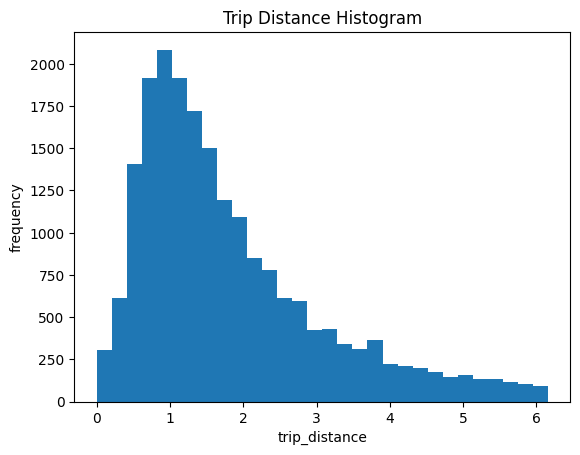

In [67]:
import matplotlib.pyplot as plt

plt.hist(data['trip_distance'], bins=30)
plt.xlabel('trip_distance')
plt.ylabel('frequency')
plt.title('Trip Distance Histogram')
plt.show()

In [68]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,20140.000000,20140.000000,20140.000000,20140.000000,20140.000000
mean,1.639126,1.822305,10.021105,1.405183,0.022790
std,1.281036,1.258363,9.635338,2.050965,0.402216
min,1.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.900000,6.000000,0.000000,0.000000
50%,1.000000,1.460000,8.500000,1.250000,0.000000
75%,2.000000,2.400000,12.500000,2.150000,0.000000
max,6.000000,6.160000,999.990000,200.000000,18.000000


In [69]:
# Q. fare_amount의 이상치 데이터 개수를 확인합니다.
# (fare_amount가 0 이하인 경우)

In [70]:
(data['fare_amount'] <= 0).sum()

np.int64(18)

In [71]:
# # Q. fare_amount의 이상치를 제거합니다.

In [72]:
data = data[data['fare_amount'] > 0]

In [73]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
14285,Mark Reed,05/03/2017 7:44:28 PM,05/03/2017 7:44:38 PM,Debit Card,1,0.00,0.01,0.00,0.00
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
13972,Matthew Blake,02/23/2017 9:21:25 AM,02/23/2017 9:21:57 AM,Cash,1,0.00,1.00,0.00,0.00
21153,Justin Jones,08/16/2017 6:59:42 AM,08/16/2017 7:00:34 AM,Debit Card,2,0.14,2.50,0.00,0.00
649,Robin Owens,03/12/2017 10:28:27 PM,03/12/2017 10:28:30 PM,Debit Card,1,0.00,2.50,3.00,0.00
...,...,...,...,...,...,...,...,...,...
11271,Daniel Carrillo,06/19/2017 12:51:17 AM,06/19/2017 12:52:12 AM,Cash,2,0.00,120.00,20.00,11.52
12513,Mr. Wesley Reyes,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,Cash,1,0.00,175.00,46.69,11.75
15476,James Dyer MD,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,Debit Card,1,0.00,200.00,11.00,0.00
20314,Nicholas Thomas,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,Cash,2,0.00,450.00,0.00,0.00


In [74]:
# 조건 위반 데이터 개수 재확인
(data['fare_amount'] <= 0).sum()

np.int64(0)

In [75]:
# 최소값 직접 확인
data['fare_amount'].min()

0.01

<br>

In [76]:
# Q. fare_amount의 scatter plot을 그립니다.

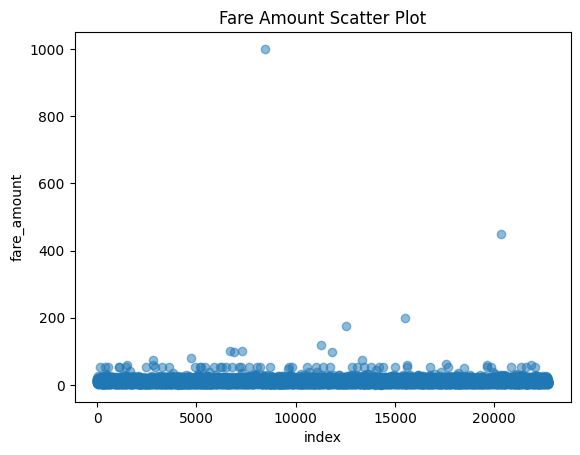

In [77]:
import matplotlib.pyplot as plt

plt.scatter(data.index, data['fare_amount'], alpha=0.5)
plt.xlabel('index')
plt.ylabel('fare_amount')
plt.title('Fare Amount Scatter Plot')
plt.show()

In [78]:
# fare_amount가 대부분 낮은 구간(0~50 근처)에 몰려 있고,
# 몇 개의 매우 큰 값(예: 200, 450, 1000 근처) 이 튀어 있는 전형적인 “롱테일 + 극단값” 형태임.
# 따라서 150 초과는 150으로 누르겠음. (캡핑, winsorizing)

In [79]:
# fare_amount가 150을 초과한다면 150으로 변환합니다.

In [80]:
def fare_func(x):
    if x > 150:
        return 150
    else:
        return x

In [81]:
# fare_amount 컬럼의 각 값에 대해 fare_func를 적용한 새 Series를 만듦

In [82]:
data['fare_amount'].apply(fare_func)

,fare_amount
0,13.0
1,16.0
2,6.5
3,20.5
4,16.5
...,...
22695,7.5
22696,4.0
22698,4.5
22699,10.5


In [83]:
# 람다로 같은 작업을 “실제로 반영”

In [84]:
data['fare_amount'] = data['fare_amount'].apply(lambda x: 150 if x > 150 else x)

In [85]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
14285,Mark Reed,05/03/2017 7:44:28 PM,05/03/2017 7:44:38 PM,Debit Card,1,0.00,0.01,0.00,0.00
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
13972,Matthew Blake,02/23/2017 9:21:25 AM,02/23/2017 9:21:57 AM,Cash,1,0.00,1.00,0.00,0.00
21153,Justin Jones,08/16/2017 6:59:42 AM,08/16/2017 7:00:34 AM,Debit Card,2,0.14,2.50,0.00,0.00
649,Robin Owens,03/12/2017 10:28:27 PM,03/12/2017 10:28:30 PM,Debit Card,1,0.00,2.50,3.00,0.00
...,...,...,...,...,...,...,...,...,...
11271,Daniel Carrillo,06/19/2017 12:51:17 AM,06/19/2017 12:52:12 AM,Cash,2,0.00,120.00,20.00,11.52
8478,Alexis Hanson,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,Credit Card,1,2.60,150.00,200.00,0.00
12513,Mr. Wesley Reyes,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,Cash,1,0.00,150.00,46.69,11.75
15476,James Dyer MD,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,Debit Card,1,0.00,150.00,11.00,0.00


In [86]:
data['fare_amount'].max()

150.0

In [87]:
(data['fare_amount'] > 150).sum()

np.int64(0)

<br>

In [88]:
# Q. tip_amount의 scatter plot을 그립니다.

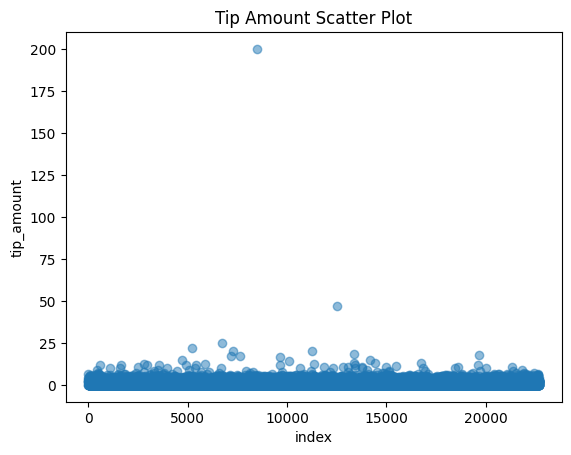

In [89]:
import matplotlib.pyplot as plt

plt.scatter(data.index, data['tip_amount'], alpha=0.5)
plt.xlabel('index')
plt.ylabel('tip_amount')
plt.title('Tip Amount Scatter Plot')
plt.show()

In [90]:
# Q. tip_amount의 이상치를 확인합니다.

In [91]:
data['tip_amount'].describe()

,tip_amount
count,20122.000000
mean,1.406440
std,2.051451
min,0.000000
25%,0.000000
50%,1.250000
75%,2.160000
max,200.000000


In [92]:
data['tip_amount'].sort_values(ascending=False).head()

,tip_amount
8478,200.00
12513,46.69
6710,25.20
5212,22.22
7283,20.16


In [93]:
# Q. tip_amount의 이상치를 제거합니다.

In [94]:
Q1 = data['tip_amount'].quantile(0.25)
Q3 = data['tip_amount'].quantile(0.75)
IQR = Q3 - Q1

In [95]:
print(Q1)
print(Q3)
print(IQR)

0.0
2.16
2.16


In [96]:
data = data[
    (data['tip_amount'] >= Q1 - 1.5 * IQR) &
    (data['tip_amount'] <= Q3 + 1.5 * IQR)
]

In [97]:
Q1 = data['tip_amount'].quantile(0.25)
Q3 = data['tip_amount'].quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

0.0
2.12
2.12


In [98]:
data['tip_amount'].describe()

,tip_amount
count,19914.000000
mean,1.327771
std,1.272773
min,0.000000
25%,0.000000
50%,1.250000
75%,2.120000
max,5.400000


In [99]:
len(data)

19914

<br>

In [100]:
# Q. tolls_amount의 scatter plot을 그립니다.

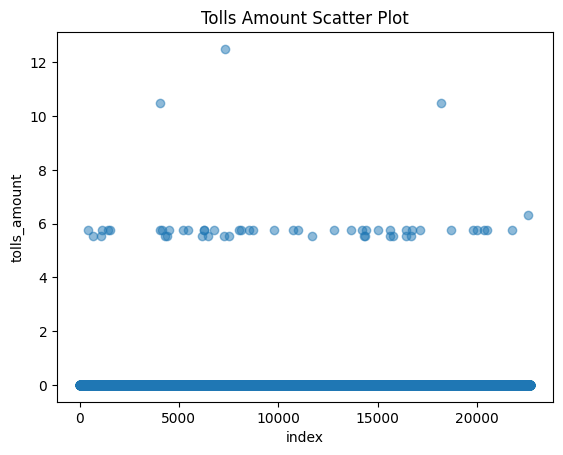

In [101]:
import matplotlib.pyplot as plt

plt.scatter(data.index, data['tolls_amount'], alpha=0.5)
plt.xlabel('index')
plt.ylabel('tolls_amount')
plt.title('Tolls Amount Scatter Plot')
plt.show()

<br>

#### **범주형 데이터 전처리**

##### **결제 방법: Debit Card와 Credit Card를 Card로 통합합니다.**

In [102]:
data.head(30)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Debit Card,6,2.30,9.0,2.06,0.0
7,Hannah Foley,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Debit Card,1,2.98,16.0,1.78,0.0
8,Katie Whitney,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,Cash,1,1.20,9.0,0.00,0.0
9,Amanda Jones,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,Cash,1,1.60,13.0,2.75,0.0
10,Cory Jensen,03/04/2017 11:58:00 AM,03/04/2017 12:13:12 PM,Cash,1,1.77,11.5,2.46,0.0
12,Ryan Reyes,06/09/2017 7:00:26 PM,06/09/2017 7:20:11 PM,Debit Card,1,3.00,15.0,3.35,0.0


In [103]:
# payment_method 컬럼에 어떤 값들이 있는지 살펴봅시다.

In [104]:
data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [105]:
data['payment_method'].nunique()

3

In [106]:
data['payment_method'].value_counts()

,count
payment_method,
Cash,9828
Debit Card,5086
Credit Card,5000


In [107]:
# Q. 'Debit Card'와 'Credit Card' 항목을 'Card'로 변환합니다.

In [108]:
data['payment_method'] = data['payment_method'].replace(
    ['Debit Card', 'Credit Card'],
    'Card'
)

In [109]:
data['payment_method'].value_counts()

,count
payment_method,
Card,10086
Cash,9828


<br>

##### **승객명: 성과 이름을 분리하여 성 부분만 저장해봅니다.**

In [110]:
example = 'Susan Robinson'

In [111]:
example.split()

['Susan', 'Robinson']

In [112]:
# Q. passenger_name을 성과 이름으로 분리하여 성 부분만 passenger_first_name 컬럼으로 저장합니다.

In [113]:
data['passenger_first_name'] = data['passenger_name'].str.split().str[0]

In [114]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0,Pamela
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0,Michelle
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0,Tina
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0,Brianna
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Card,6,2.30,9.0,2.06,0.0,Justin


<br>

##### **택시 탑승, 하차 시간을 활용해봅시다.**

In [115]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0,Pamela
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0,Michelle
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0,Tina
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0,Brianna
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Card,6,2.30,9.0,2.06,0.0,Justin


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19914 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         19914 non-null  object 
 1   tpep_pickup_datetime   19914 non-null  object 
 2   tpep_dropoff_datetime  19914 non-null  object 
 3   payment_method         19914 non-null  object 
 4   passenger_count        19914 non-null  int64  
 5   trip_distance          19914 non-null  float64
 6   fare_amount            19914 non-null  float64
 7   tip_amount             19914 non-null  float64
 8   tolls_amount           19914 non-null  float64
 9   passenger_first_name   19914 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.2+ MB


In [117]:
# Q. tpep_pickup_datetime 컬럼의 object 자료형을 datetime으로 변환합니다.

In [118]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

In [119]:
data.head(1)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name
0,Pamela Duffy,2017-03-25 08:55:43,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0,Pamela


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19914 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         19914 non-null  object        
 1   tpep_pickup_datetime   19914 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  19914 non-null  object        
 3   payment_method         19914 non-null  object        
 4   passenger_count        19914 non-null  int64         
 5   trip_distance          19914 non-null  float64       
 6   fare_amount            19914 non-null  float64       
 7   tip_amount             19914 non-null  float64       
 8   tolls_amount           19914 non-null  float64       
 9   passenger_first_name   19914 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 2.2+ MB


In [121]:
# Q. tpep_dropoff_datetime 컬럼의 object 자료형을 datetime으로 변환합니다.

In [122]:
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [124]:
data['tpep_dropoff_datetime'].head(1)

,tpep_dropoff_datetime
0,2017-03-25 09:09:47


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19914 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         19914 non-null  object        
 1   tpep_pickup_datetime   19914 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  19914 non-null  datetime64[ns]
 3   payment_method         19914 non-null  object        
 4   passenger_count        19914 non-null  int64         
 5   trip_distance          19914 non-null  float64       
 6   fare_amount            19914 non-null  float64       
 7   tip_amount             19914 non-null  float64       
 8   tolls_amount           19914 non-null  float64       
 9   passenger_first_name   19914 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 2.2+ MB


In [128]:
# Q. 하차 시각과 승차 시각의 차이를 travel_time 컬럼으로 저장합니다.

In [129]:
data['travel_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

In [130]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,0 days 00:14:04
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,0 days 00:26:30
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,0 days 00:07:12
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,0 days 00:16:43
5,Justin Smith,2017-03-25 20:34:11,2017-03-25 20:42:11,Card,6,2.30,9.0,2.06,0.0,Justin,0 days 00:08:00


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19914 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         19914 non-null  object         
 1   tpep_pickup_datetime   19914 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  19914 non-null  datetime64[ns] 
 3   payment_method         19914 non-null  object         
 4   passenger_count        19914 non-null  int64          
 5   trip_distance          19914 non-null  float64        
 6   fare_amount            19914 non-null  float64        
 7   tip_amount             19914 non-null  float64        
 8   tolls_amount           19914 non-null  float64        
 9   passenger_first_name   19914 non-null  object         
 10  travel_time            19914 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(3), timedelta64[ns](1)
memory usage: 2.3+ MB


In [132]:
# Q. travel_time 컬럼의 데이터를 초 단위로 변환합니다.

In [133]:
data['travel_time'] = data['travel_time'].dt.total_seconds()

<br>

#### **보너스 (feature engineering 맛보기)**

In [134]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,844.0
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,1590.0
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,432.0
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,1003.0
5,Justin Smith,2017-03-25 20:34:11,2017-03-25 20:42:11,Card,6,2.30,9.0,2.06,0.0,Justin,480.0


In [135]:
# Q. 승객이 지불한 총 요금을 total_amount 컬럼으로 저장합니다.

In [136]:
data['total_amount'] = data['fare_amount'] + data['tip_amount'] + data['tolls_amount']

In [137]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,total_amount
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,844.0,15.76
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,1590.0,20.00
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,432.0,7.95
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,1003.0,16.50
5,Justin Smith,2017-03-25 20:34:11,2017-03-25 20:42:11,Card,6,2.30,9.0,2.06,0.0,Justin,480.0,11.06


In [138]:
# Q. fare_amount와 trip_distance 사이의 관계를 scatter plot으로 표현합니다.

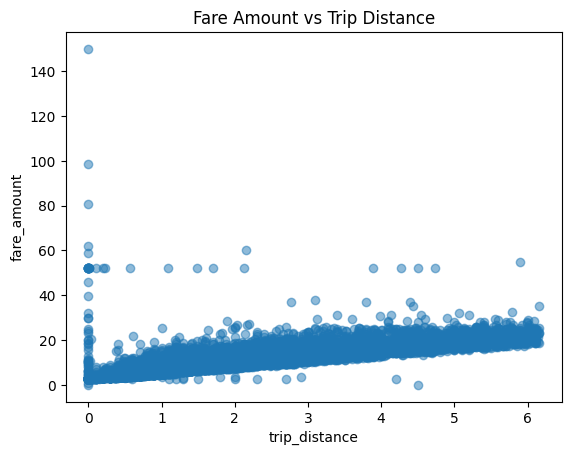

In [139]:
import matplotlib.pyplot as plt

plt.scatter(data['trip_distance'], data['fare_amount'], alpha=0.5)
plt.xlabel('trip_distance')
plt.ylabel('fare_amount')
plt.title('Fare Amount vs Trip Distance')
plt.show()

<Axes: xlabel='fare_amount', ylabel='trip_distance'>

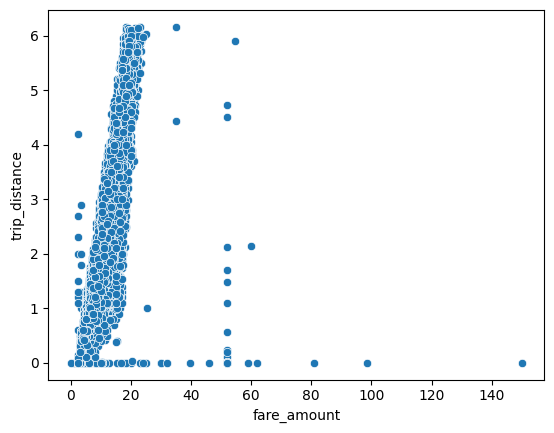

In [153]:
sns.scatterplot(x = data['fare_amount'], y = data['trip_distance'])

In [140]:
# Q. fare_amount와 travel_time 사이의 관계를 scatter plot으로 표현합니다.

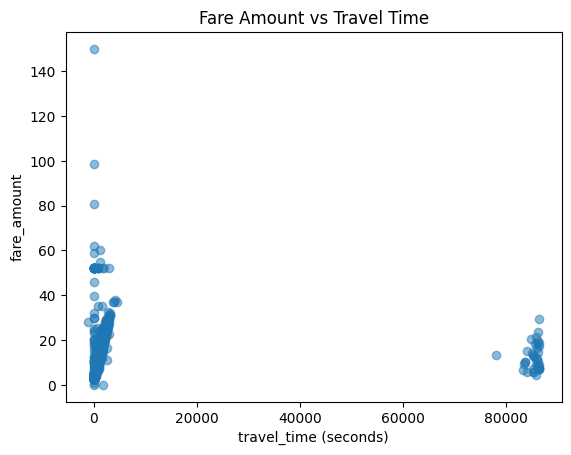

In [141]:
import matplotlib.pyplot as plt

plt.scatter(data['travel_time'], data['fare_amount'], alpha=0.5)
plt.xlabel('travel_time (seconds)')
plt.ylabel('fare_amount')
plt.title('Fare Amount vs Travel Time')
plt.show()

<Axes: xlabel='fare_amount', ylabel='travel_time'>

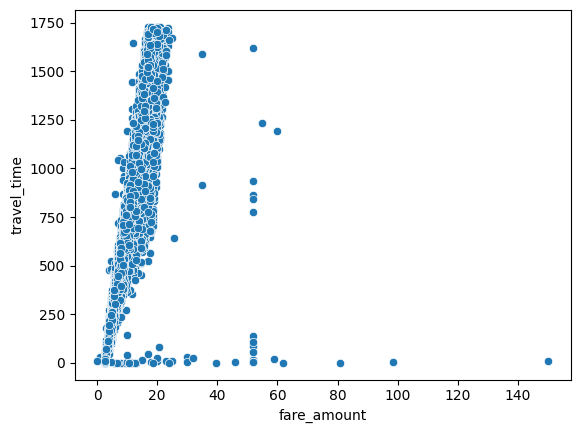

In [152]:
sns.scatterplot(x = data['fare_amount'], y = data['travel_time'])

In [142]:
# Q. trip_distance와 travel_time 사이의 관계를 scatter plot으로 표현합니다.

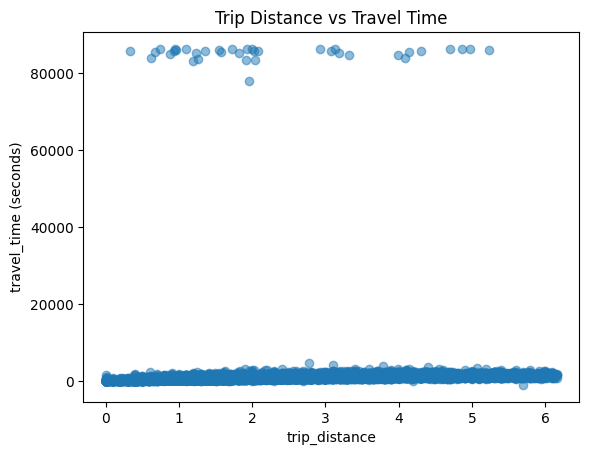

In [143]:
import matplotlib.pyplot as plt

plt.scatter(data['trip_distance'], data['travel_time'], alpha=0.5)
plt.xlabel('trip_distance')
plt.ylabel('travel_time (seconds)')
plt.title('Trip Distance vs Travel Time')
plt.show()

In [144]:
# Q. scatter plot으로 관찰된 travel_time의 이상치를 제거합니다.

In [145]:
Q1 = data['travel_time'].quantile(0.25)
Q3 = data['travel_time'].quantile(0.75)
IQR = Q3 - Q1

In [146]:
print(Q1)
print(Q3)
print(IQR)

372.0
915.0
543.0


In [147]:
data = data[
    (data['travel_time'] >= Q1 - 1.5 * IQR) &
    (data['travel_time'] <= Q3 + 1.5 * IQR)
]

In [148]:
Q1 = data['travel_time'].quantile(0.25)
Q3 = data['travel_time'].quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

366.25
877.0
510.75


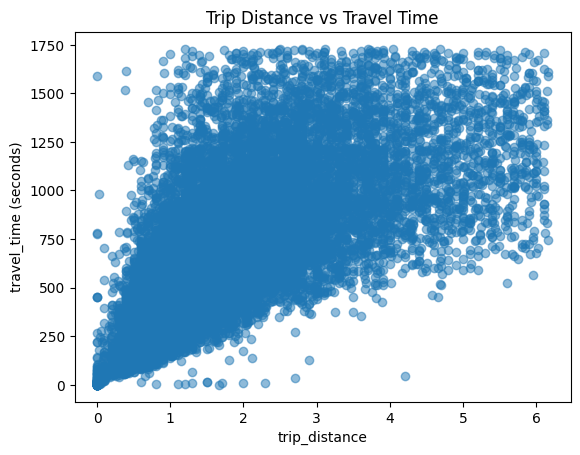

In [149]:
plt.scatter(data['trip_distance'], data['travel_time'], alpha=0.5)
plt.xlabel('trip_distance')
plt.ylabel('travel_time (seconds)')
plt.title('Trip Distance vs Travel Time')
plt.show()